In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import seaborn as sns

In [47]:
#read the file
df1= pd.read_csv('Documents/GitHub/IF/data.csv')
df1.head()

,date,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,USD PMI,CNY PMI,ZA PMI,CHF PMI,JPY PMI,USD M2YoY,CNY M2YoY,ZA M2YoY,CHF M2YoY,JPY M2YoY
0,2004-01,8.28,6.93,1.24,106.48,0.018991,0.155518,0.112978,0.182694,0.060531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-02,8.28,6.77,1.24,106.55,0.019552,0.173791,0.123553,0.197181,0.062438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-03,8.28,6.64,1.28,108.62,0.020094,0.221002,0.141914,0.227796,0.076555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-04,8.28,6.56,1.30,107.25,0.019944,0.222297,0.136795,0.204015,0.071361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-05,8.28,6.79,1.28,112.35,0.020147,0.194379,0.138205,0.186367,0.066312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# choose the data started from 2007-02 and stop on 2018-06
df=df1.drop(range(0, 37),)
df.to_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata.csv',sep=',')
df=pd.read_csv('C:\\Users\\Angel\\Documents\\GitHub\\IF\\newdata.csv')
df=df.iloc[:137, 1:]
df.tail()

,date,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,USD PMI,CNY PMI,ZA PMI,CHF PMI,JPY PMI,USD M2YoY,CNY M2YoY,ZA M2YoY,CHF M2YoY,JPY M2YoY
132,2018-02,6.32,11.82,0.93,107.82,0.023327,0.094688,0.151539,0.270377,0.093124,60.8,0.83,0.86,1.08,0.89,4.09,8.8,7.68,4.14,3.2
133,2018-03,6.32,11.84,0.95,106.00,0.023284,0.112889,0.157870,0.296140,0.102231,59.3,0.87,0.81,1.02,0.90,4.03,8.2,7.87,3.87,3.1
134,2018-04,6.30,12.09,0.97,107.43,0.023138,0.114831,0.146282,0.276557,0.095332,57.3,0.90,0.85,1.11,0.94,3.78,8.3,6.89,3.66,3.2
135,2018-05,6.38,12.53,1.00,109.69,0.023260,0.119837,0.165655,0.292477,0.096883,58.7,0.88,0.85,1.06,0.90,3.87,8.3,5.51,3.04,3.2
136,2018-06,6.46,13.30,0.99,110.03,0.023130,0.113460,0.168373,0.294090,0.098076,60.2,0.86,0.74,1.03,0.88,4.24,8.0,5.01,2.65,3.1


In [50]:
# describe the data
df.describe()

,CNY,ZA,CHF,JPY,USD TO,CNY TO,ZA TO,CHF TO,JPY TO,USD PMI,CNY PMI,ZA PMI,CHF PMI,JPY PMI,USD M2YoY,CNY M2YoY,ZA M2YoY,CHF M2YoY,JPY M2YoY
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,6.606934,9.931825,0.997664,100.889197,0.023740,0.148240,0.166965,0.258644,0.092731,52.816788,0.984672,0.940949,1.024891,0.953723,6.340000,15.252190,8.587591,6.936423,2.981752
std,0.405935,2.664483,0.093441,13.900001,0.001729,0.032706,0.019546,0.045219,0.010789,5.248929,0.105231,0.110320,0.092404,0.060961,1.938528,4.948829,5.195267,10.223958,0.737765
min,6.100000,6.700000,0.780000,76.770000,0.019337,0.082851,0.118153,0.171324,0.056192,33.100000,0.830000,0.700000,0.850000,0.780000,1.620000,8.000000,-1.240000,-8.540000,1.000000
25%,6.300000,7.600000,0.940000,90.290000,0.022437,0.119854,0.154210,0.219659,0.086557,50.800000,0.920000,0.870000,0.960000,0.920000,5.550000,12.400000,5.600000,1.760000,2.400000
50%,6.560000,9.180000,0.970000,102.130000,0.023549,0.145372,0.165935,0.257943,0.093542,53.000000,0.960000,0.930000,1.010000,0.950000,6.240000,14.000000,7.680000,4.230000,3.000000
75%,6.830000,12.090000,1.040000,112.340000,0.025204,0.169366,0.178138,0.292126,0.100954,56.500000,1.020000,1.000000,1.080000,0.980000,7.230000,17.370000,10.010000,10.030000,3.500000
max,7.750000,16.390000,1.240000,123.750000,0.026837,0.230439,0.230570,0.408002,0.117965,60.800000,1.460000,1.280000,1.280000,1.120000,10.580000,29.740000,24.390000,41.740000,4.400000


In [70]:
# operate on the Chinese data firstly. take log on each variable(keep M2YoY unchanged )
df['lCNY'] = np.log(df[['CNY']])
df['lCNY TO'] = np.log(df[['CNY TO']])
df['lCNY PMI'] = np.log(df[['CNY PMI']])
# take ADF test on these 4 variables to check its stableness
print(ts.adfuller(df['lCNY']))
print(ts.adfuller(df['lCNY TO']))
print(ts.adfuller(df['lCNY PMI']))
print(ts.adfuller(df['CNY M2YoY']))
# raw data not stable under 1% significant level

(-2.5292043734644083, 0.10852930160833396, 9, 127, {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}, -919.474582428699)
(-1.7426104813970469, 0.40930268802106196, 13, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, -255.9668824712403)
(-2.4093719541137077, 0.1391086971498811, 0, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, -438.0800229249131)
(-0.8291174680192122, 0.8104190698316917, 13, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, 347.73798967491734)


In [136]:
#df['lCNY']

In [78]:
# take first-order and conduct ADF test
df['difflCNY'] = df['lCNY'].diff(periods = 1)
df['difflCNY TO'] = df['lCNY TO'].diff(periods = 1)
df['difflCNY PMI'] = df['lCNY PMI'].diff(periods = 1)
df['diffCNY M2YoY'] = df['CNY M2YoY'].diff(periods = 1)

print(ts.adfuller(df['difflCNY'].drop(0,)))
print(ts.adfuller(df['difflCNY TO'].drop(0,)))
print(ts.adfuller(df['difflCNY PMI'].drop(0,)))
print(ts.adfuller(df['diffCNY M2YoY'].drop(0,)))
# all the variables tend to be stable under 1% significant level

(-3.360420591953739, 0.012384442309500107, 8, 127, {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}, -909.8561315815955)
(-2.7679657459864333, 0.06299733208875796, 12, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, -251.3870418698093)
(-11.179691661583478, 2.5190054803175085e-20, 0, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, -426.39274506567745)
(-3.6262071658808064, 0.005279321990233068, 12, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, 344.5745165588056)


In [157]:
df['lCNY_1'] = 0
size_sample = 136

for i in range(size_sample):
    df.loc[i,'lCNY_1'] = df.loc[i+1,'difflCNY']
    
df.loc[size_sample,'lCNY_1'] = df.loc[0,'difflCNY']

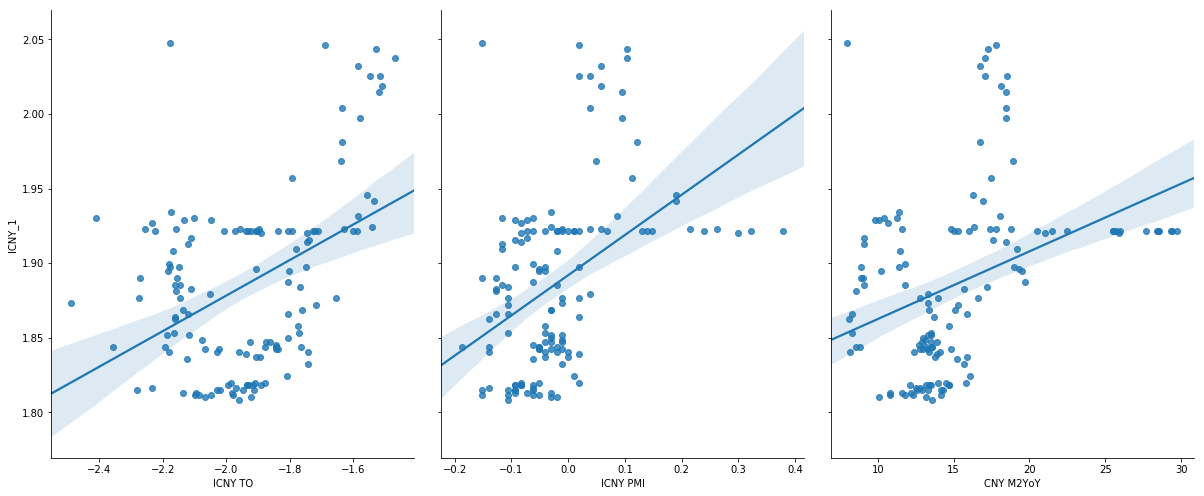

In [141]:
#correlation = df['lCNY','lCNY TO','lCNY PMI','CNY M2YoY'].corr() 
#sns.heatmap(correlation)
#plt.show()
# check relation
sns.pairplot(df, x_vars=['lCNY TO','lCNY PMI','CNY M2YoY'], y_vars='lCNY_1', size=7, aspect=0.8, kind='reg')  
plt.show()

In [144]:
# run regression with whole data
df['const'] = 1 # create column of constant

reg_int = sm.OLS(endog=df['lCNY_1'], exog=df[['const', 'lCNY TO','lCNY PMI','CNY M2YoY']], missing='drop')
results = reg_int.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lCNY_1   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     5.751
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           0.000996
Time:                        18:27:44   Log-Likelihood:                 496.74
No. Observations:                 136   AIC:                            -985.5
Df Residuals:                     132   BIC:                            -973.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0259      0.007     -3.871      0.0

In [145]:
#results.resid
print(ts.adfuller(results.resid))

(-4.211443030118306, 0.0006301206900407982, 8, 127, {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}, -909.1963890527095)


In [160]:
# Now we do it recursively with window length=60
size_sample = 137
size_subsample = 24

fcst_beer = np.zeros(size_sample - size_subsample)
fcst_error_beer = np.zeros(size_sample - size_subsample)
for i in range (size_sample - size_subsample):

    reg_beersub = sm.OLS(endog=df.loc[i:size_subsample-1+i,'lCNY_1'], exog=df.loc[df.index[i:size_subsample+i],['const', 'lCNY TO','lCNY PMI','CNY M2YoY']], missing='drop')
    results_sub = reg_beersub.fit()
    
    # error = results_sub.predict(exog = [1, erf.loc[size_subsample+i,'int_diff']]) - erf.loc[size_subsample+i, 'dep_1']
    
    fcst_beer[i] = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCNY TO','lCNY PMI','CNY M2YoY']]])
    error = results_sub.predict(exog = [df.loc[size_subsample+i,['const', 'lCNY TO','lCNY PMI','CNY M2YoY']]]) - df.loc[size_subsample+i, 'lCNY']
    fcst_error_beer[i] = error
    
fcst_error_beer=np.where(np.isnan(fcst_error_beer),0,fcst_error_beer)
fcst_error_beer
#fcst_beer

array([-1.92843449, -1.93502   , -1.92639094, -1.92257676, -1.92276685,
       -1.92246359, -1.92151234, -1.92269748, -1.92029489, -1.92059532,
       -1.92268382, -1.92103135, -1.91980932, -1.92293388, -1.92263423,
       -1.92224516, -1.92066968, -1.9149628 , -1.91625222, -1.91062887,
       -1.8995366 , -1.89846034, -1.8973051 , -1.89141392, -1.88783083,
       -1.88750815, -1.88159382, -1.876525  , -1.8728411 , -1.8704697 ,
       -1.86418   , -1.85914393, -1.85442382, -1.85153539, -1.84904431,
       -1.84600575, -1.84308028, -1.84664461, -1.84351981, -1.84529783,
       -1.84588818, -1.84572769, -1.84825416, -1.84930619, -1.84245036,
       -1.84049342, -1.84025578, -1.83989652, -1.83807853, -1.83845204,
       -1.83477603, -1.82793184, -1.82101677, -1.82218055, -1.82091699,
       -1.81872168, -1.81602143, -1.81556289, -1.81177142, -1.80849403,
       -1.80824998, -1.81202649, -1.81772188, -1.81787746, -1.81983631,
       -1.81847796, -1.81703657, -1.81658346, -1.8138398 , -1.81

In [147]:
# Compute RMSE for the Beer model
rmse_beer = np.sqrt(np.mean(fcst_error_beer**2))
rmse_beer

1.876192443728069

In [148]:
rmse_rw = np.sqrt(np.mean(df.loc[size_subsample: size_sample-1, 'lCNY']**2))
rmse_rw

1.8737044187395437

ValueError: x and y must have same first dimension, but have shapes (114,) and (112,)

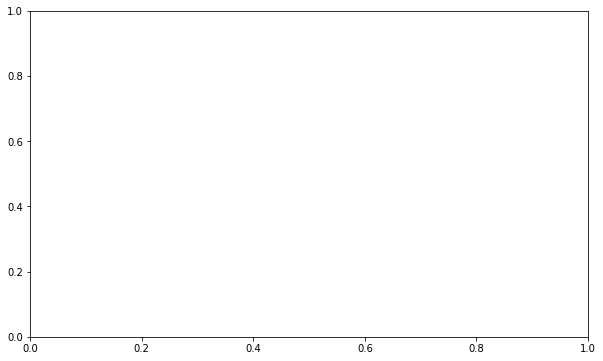

In [164]:
df_d = df.set_index('date')

fig, ax = plt.subplots(figsize = (10, 6))
x = np.ones(113)
x = x.cumsum()
# size_subsample+1 取消了 why？？？
y = df.loc[size_subsample+1: size_sample, 'difflCNY']
ax.plot(x, y, 'r-', linewidth=2, label=r'Actual Depreciation', alpha=0.6)

y = fcst_beer
ax.plot(x, y, label = 'Forecasted Depreciation')
ax.legend()

ax.set_title('Actual vs. Forecast') 


plt.show()